%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
[[-0.12777387 -0.19894857 -0.25069211 ...  0.2747779   0.28922865
   0.29283187]
 [-0.09554454 -0.15910062 -0.20374607 ...  0.28540741  0.28947772
   0.29531599]
 [-0.05455676 -0.1067485  -0.14361472 ...  0.27741985  0.27329129
   0.27358756]
 ...
 [-0.22675445 -0.28426076 -0.31048417 ... -0.19712676 -0.18155179
  -0.16973488]
 [-0.2416263  -0.28349067 -0.29946342 ... -0.12556905 -0.10413146
  -0.10969029]
 [-0.24800651 -0.27552747 -0.28661649 ... -0.06791472 -0.06773423
  -0.06887426]] [[ 0.00353223 -0.01386645 -0.02135161 ...  0.16356542  0.16770522
   0.16588888]
 [ 0.0271724   0.01140631  0.00073109 ...  0.16436884  0.1606861
   0.15512419]
 [ 0.04213783  0.02584917  0.01625286 ...  0.16310039  0.15681637
   0.14909426]
 ...
 [-0.06335376 -0.0639777  -0.06600003 ...  0.18706722  0.17769752
   0.16559766]
 [-0.04756953 -0.05098756 -0.05797609

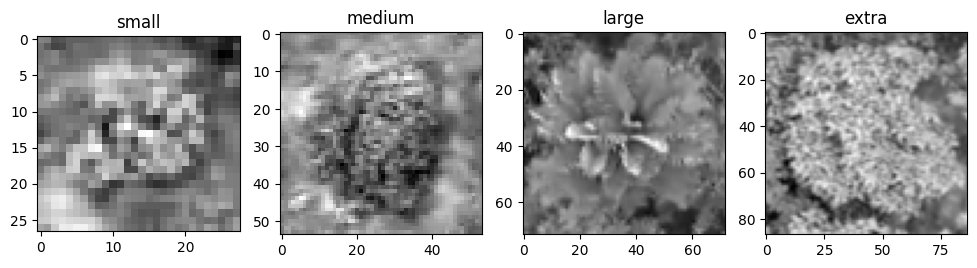

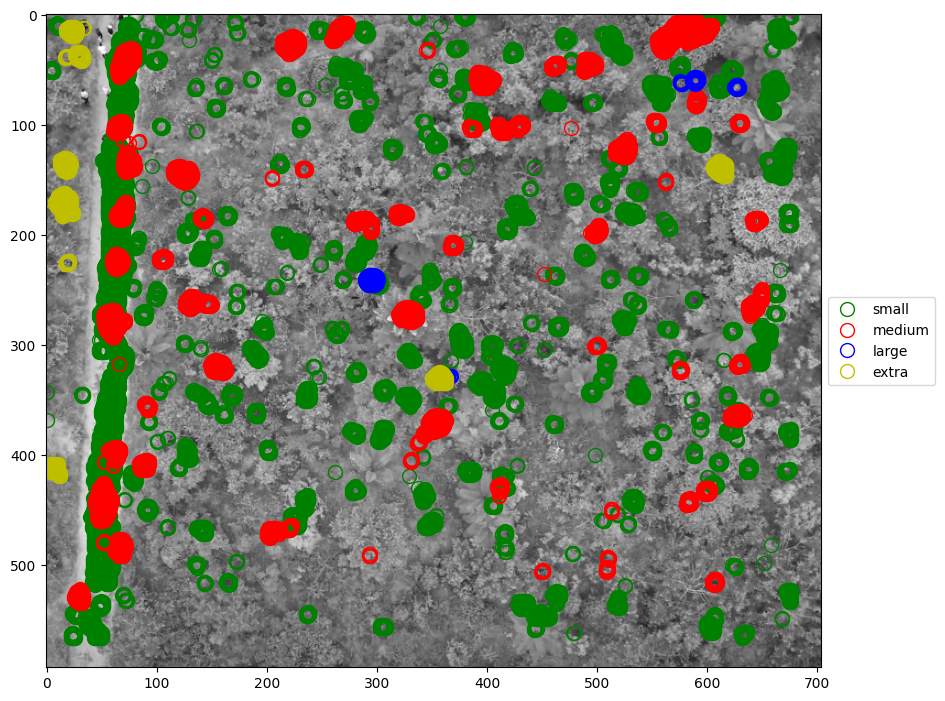

In [23]:
# Adaptado de: https://hatarilabs.com/ih-en/tree-counting-and-classification-with-python-and-scikit-image-tutorial

%pylab inline
from PIL import Image
import numpy as np
from skimage.feature import match_template
from skimage.filters import gaussian

# Load images without normalization
ImagenTotal = np.asarray(Image.open('Rst/abundance_total.png'))
ImagenTemplateSmall = np.asarray(Image.open('Rst/abundance_small.png'))
ImagenTemplateMedium = np.asarray(Image.open('Rst/abundance_medium.png'))
ImagenTemplateLarge = np.asarray(Image.open('Rst/abundance_large.png'))
ImagenTemplateExtra = np.asarray(Image.open('Rst/abundance_extra.png'))

# Work with the green channel
imagen = ImagenTotal[:, :, 1]
arbolsmall = ImagenTemplateSmall[:, :, 1]
arbolmedium = ImagenTemplateMedium[:, :, 1]
arbollarge = ImagenTemplateLarge[:, :, 1]
arbolextra = ImagenTemplateExtra[:, :, 1]

# Visualize templates
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
template_titles = ['small', 'medium', 'large', 'extra']
for ax, template, title in zip(axs, [arbolsmall, arbolmedium, arbollarge, arbolextra], template_titles):
    ax.imshow(template, cmap=plt.cm.gray)
    ax.set_title(title)

# Create results for every template type
resultsmall = match_template(imagen, arbolsmall)
resultmedium = match_template(imagen, arbolmedium)
resultlarge = match_template(imagen, arbollarge)
resultextra = match_template(imagen, arbolextra)

print(resultsmall, resultmedium, resultlarge, resultextra)

# Apply Gaussian filter to smooth results
resultsmall = gaussian(resultsmall, sigma=1)
resultmedium = gaussian(resultmedium, sigma=1)
resultlarge = gaussian(resultlarge, sigma=1)
resultextra = gaussian(resultextra, sigma=1)

# Set threshold and find matches
threshold = 0.25
resultsmallquery = np.where(resultsmall > threshold)
resultmediumquery = np.where(resultmedium > threshold)
resultlargequery = np.where(resultlarge > threshold)
resultextraquery = np.where(resultextra > threshold)

def listapuntos(result):
    xlist = []
    ylist = []
    for punto in range(len(result[1])):
        xlist.append(result[1][punto])
        ylist.append(result[0][punto])
    return xlist, ylist

# Show the interpreted results
plt.figure(figsize=(10, 10))
plt.imshow(imagen, cmap='gray')

# Plot detected matches
plt.plot(listapuntos(resultsmallquery)[0], listapuntos(resultsmallquery)[1], 'o', markeredgecolor='g', markerfacecolor='none', markersize=10, label="small")
plt.plot(listapuntos(resultmediumquery)[0], listapuntos(resultmediumquery)[1], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10, label="medium")
plt.plot(listapuntos(resultlargequery)[0], listapuntos(resultlargequery)[1], 'o', markeredgecolor='b', markerfacecolor='none', markersize=10, label="large")
plt.plot(listapuntos(resultextraquery)[0], listapuntos(resultextraquery)[1], 'o', markeredgecolor='y', markerfacecolor='none', markersize=10, label="extra")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
